In [1]:
# part of the magwire package
# calculate magnetic fields arising from electrical current through wires of arbitrary shape
# with the law of Biot-Savart
# written by Michael Wack 2015
# wack@geophysik.uni-muenchen.de
# tested with python 3.4.3
# some basic calculations for testing
#
# edits, updates, and modifications by E.J. Brash - February, 2020

import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.append(os.getcwd()+'/magfield')

import wire
import biotsavart

found 1 wire(s).
length of discretized path =  200
wire 1 has 199 segments
total number of segments: 199
number of field points: 343
total number of calculations: 68257
time needed for calculation: 0.04060530200000123 s


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/home/brash/phys441/nmfp/Cpp/magfield/biotsavart.py:101: RuntimeWarning: invalid value encountered in true_divide
  r3 = r2 / r25[:, np.newaxis]
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


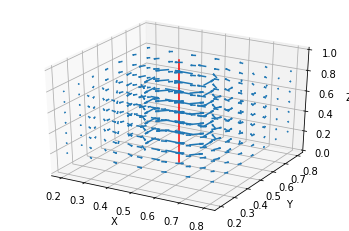

In [5]:
w = wire.Wire(path=wire.Wire.LinearPath([0.5,0.5,0.0],[0.5,0.5,1.0],pts=200), discretization_length=0.01, current=1000000)
sol = biotsavart.BiotSavart(wire=w)

resolution = 0.1
volume_corner1 = (.2, .2, .2)
volume_corner2 = (.8, .8, .8)

grid = np.mgrid[volume_corner1[0]:volume_corner2[0]:resolution, volume_corner1[1]:volume_corner2[1]:resolution, volume_corner1[2]:volume_corner2[2]:resolution]

# create list of grid points
points = np.vstack(map(np.ravel, grid)).T
#for p in points:
#    print (p)

# calculate B field at given points
B = sol.CalculateB(points=points)
Babs = np.linalg.norm(B, axis=1)

#for bs in Babs:
#    print (bs)

# draw results
# remove big values close to the wire
cutoff = 4.0
minvalue = 0.0002

B[Babs > cutoff] = [np.nan,np.nan,np.nan]
B[Babs < minvalue] = [np.nan,np.nan,np.nan]

fig = plt.figure()
# 3d quiver
ax = fig.gca(projection='3d')
sol.mpl3d_PlotWires(ax)
ax.quiver(points[:, 0], points[:, 1], points[:, 2], B[:, 0], B[:, 1], B[:, 2], length=0.04)
plt.show()
